In [1]:
%cd /content/drive/MyDrive/UIT/Data mining

/content/drive/MyDrive/UIT/Data mining


In [2]:
!apt-get remove openjdk*


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'openjdk-11-jdk' for glob 'openjdk*'
Note, selecting 'openjdk-11-jre' for glob 'openjdk*'
Note, selecting 'openjdk-11-jre-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-jre-headless' for glob 'openjdk*'
Note, selecting 'openjdk-8-jre-zero' for glob 'openjdk*'
Note, selecting 'openjdk-11-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-21-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-21-demo' for glob 'openjdk*'
Note, selecting 'openjdk-18-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-17-dbg' for glob 'openjdk*'
Note, selecting 'openjdk-17-doc' for glob 'openjdk*'
Note, selecting 'openjdk-18-dbg' for glob 'openjdk*'
Note, selecting 'openjdk-17-jdk' for glob 'openjdk*'
Note, selecting 'openjdk-18-doc' for glob 'openjdk*'
Note, selecting 'openjdk-17-jre' for glob 'openjd

In [3]:
!apt-get update
!apt-get install openjdk-21-jdk -y


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,610 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,461 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,4

In [4]:
!java --version

openjdk 21.0.4 2024-07-16
OpenJDK Runtime Environment (build 21.0.4+7-Ubuntu-1ubuntu222.04)
OpenJDK 64-Bit Server VM (build 21.0.4+7-Ubuntu-1ubuntu222.04, mixed mode, sharing)


Algorithm   Support (%) Total Time (s) Sequences Count   
PrefixSpan  10          1.138          651               
GSP         10          7.211          651               
SPADE       10          1.338          651               
PrefixSpan  15          0.837          225               
GSP         15          2.918          225               
SPADE       15          0.396          225               
PrefixSpan  20          0.733          101               
GSP         20          2.634          101               
SPADE       20          0.364          101               
PrefixSpan  25          0.602          59                
GSP         25          1.207          59                
SPADE       25          0.190          59                
PrefixSpan  30          0.858          32                
GSP         30          0.879          32                
SPADE       30          0.231          32                
PrefixSpan  35          0.450          21                
GSP         35

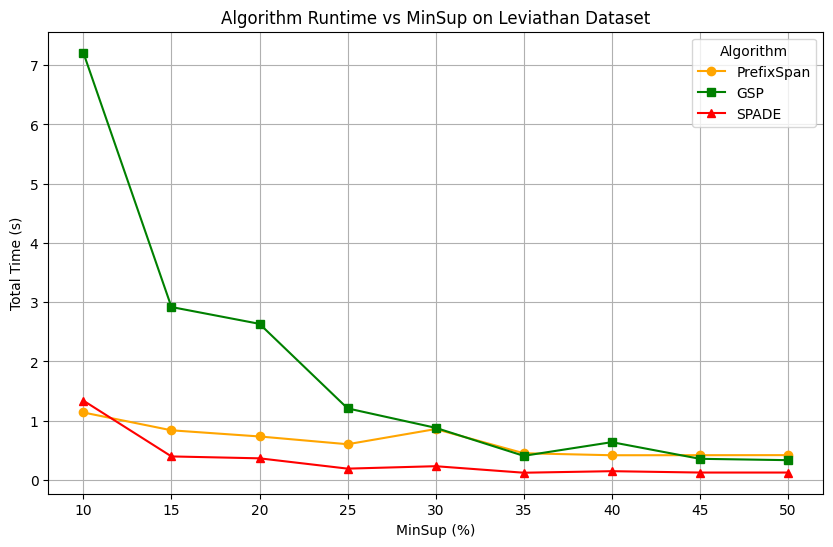

In [32]:
import subprocess
import re
import matplotlib.pyplot as plt

supports = [10, 15, 20, 25, 30, 35, 40, 45, 50]
input_file = "data/LEVIATHAN.txt"
algorithms = ["PrefixSpan", "GSP", "SPADE"]

results_table = []

for support in supports:
    for algo in algorithms:
        output_file = f"output/e_shop/{algo}_{support}percent.txt"
        command = ["java", "-jar", "spmf.jar", "run", algo, input_file, output_file, f"{support}%"]
        result = subprocess.run(command, capture_output=True, text=True)

        total_time_match = re.search(r"Total time ~ (\d+) ms", result.stdout)
        sequence_count_match = re.search(r"Frequent sequences count : (\d+)", result.stdout)

        if total_time_match and sequence_count_match:
            # Convert milliseconds to seconds
            total_time_seconds = int(total_time_match.group(1)) / 1000
            results_table.append({
                "Algorithm": algo,
                "Support (%)": support,
                "Total Time (s)": total_time_seconds,
                "Frequent Sequences Count": int(sequence_count_match.group(1))
            })

print(f"{'Algorithm':<12}{'Support (%)':<12}{'Total Time (s)':<15}{'Sequences Count':<18}")
print("=" * 60)
for result in results_table:
    print(f"{result['Algorithm']:<12}{result['Support (%)']:<12}{result['Total Time (s)']:<15.3f}{result['Frequent Sequences Count']:<18}")

# Extract runtime data for plotting
prefixspan_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "PrefixSpan"]
gsp_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "GSP"]
spade_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "SPADE"]

plt.figure(figsize=(10, 6))
plt.plot(supports, prefixspan_times, marker='o', color='orange', label='PrefixSpan')
plt.plot(supports, gsp_times, marker='s', color='green', label='GSP')
plt.plot(supports, spade_times, marker='^', color='red', label='SPADE')

plt.title("Algorithm Runtime vs MinSup on Leviathan Dataset")
plt.xlabel("MinSup (%)")
plt.ylabel("Total Time (s)")
plt.legend(title="Algorithm")
plt.grid(True)
plt.show()


In [17]:
!java -jar spmf.jar run PrefixSpan data/e_shop.txt /content/output.txt 80%

>/content/drive/MyDrive/UIT/Data mining/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 1851 ms
 Frequent sequences count : 6
 Max memory (mb) : 81.62870025634766
 minsup = 19221 sequences.
 Pattern count : 6



Algorithm   Support (%) Total Time (s) Sequences Count   
PrefixSpan  15          3.476          1510              
GSP         15          16.940         1510              
SPADE       15          0.717          1510              
PrefixSpan  20          1.591          315               
GSP         20          2.713          315               
SPADE       20          0.305          315               
PrefixSpan  25          2.615          169               
GSP         25          1.372          169               
SPADE       25          0.409          169               
PrefixSpan  30          0.769          69                
GSP         30          0.652          69                
SPADE       30          0.244          69                
PrefixSpan  35          1.269          35                
GSP         35          0.444          35                
SPADE       35          0.086          35                
PrefixSpan  40          0.447          3                 
GSP         40

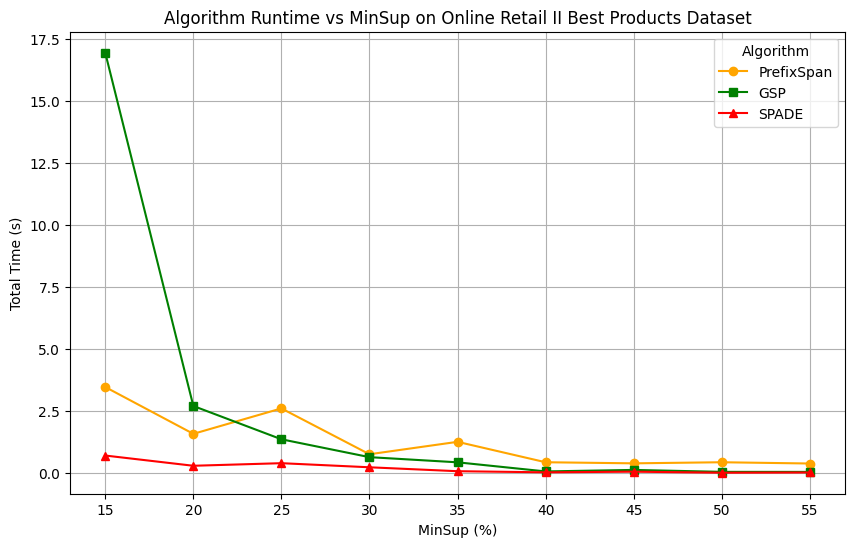

In [31]:
import subprocess
import re
import matplotlib.pyplot as plt

supports = [15, 20, 25, 30, 35, 40, 45, 50, 55]
input_file = "data/online_retail_II_best_products.txt"
algorithms = ["PrefixSpan", "GSP", "SPADE"]

results_table = []

for support in supports:
    for algo in algorithms:
        output_file = f"output/e_shop/{algo}_{support}percent.txt"
        command = ["java", "-jar", "spmf.jar", "run", algo, input_file, output_file, f"{support}%"]
        result = subprocess.run(command, capture_output=True, text=True)

        total_time_match = re.search(r"Total time ~ (\d+) ms", result.stdout)
        sequence_count_match = re.search(r"Frequent sequences count : (\d+)", result.stdout)

        if total_time_match and sequence_count_match:
            # Convert milliseconds to seconds
            total_time_seconds = int(total_time_match.group(1)) / 1000
            results_table.append({
                "Algorithm": algo,
                "Support (%)": support,
                "Total Time (s)": total_time_seconds,
                "Frequent Sequences Count": int(sequence_count_match.group(1))
            })

print(f"{'Algorithm':<12}{'Support (%)':<12}{'Total Time (s)':<15}{'Sequences Count':<18}")
print("=" * 60)
for result in results_table:
    print(f"{result['Algorithm']:<12}{result['Support (%)']:<12}{result['Total Time (s)']:<15.3f}{result['Frequent Sequences Count']:<18}")

# Extract runtime data for plotting
prefixspan_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "PrefixSpan"]
gsp_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "GSP"]
spade_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "SPADE"]

plt.figure(figsize=(10, 6))
plt.plot(supports, prefixspan_times, marker='o', color='orange', label='PrefixSpan')
plt.plot(supports, gsp_times, marker='s', color='green', label='GSP')
plt.plot(supports, spade_times, marker='^', color='red', label='SPADE')

plt.title("Algorithm Runtime vs MinSup on Online Retail II Best Products Dataset")
plt.xlabel("MinSup (%)")
plt.ylabel("Total Time (s)")
plt.legend(title="Algorithm")
plt.grid(True)
plt.show()


Algorithm   Support (%) Total Time (s) Sequences Count   
PrefixSpan  15          2.544          28                
GSP         15          0.285          13                
SPADE       15          0.059          28                
PrefixSpan  20          0.778          12                
GSP         20          0.318          7                 
SPADE       20          0.042          12                
PrefixSpan  25          0.708          8                 
GSP         25          0.151          6                 
SPADE       25          0.067          8                 
PrefixSpan  30          1.329          5                 
GSP         30          0.149          5                 
SPADE       30          0.044          5                 
PrefixSpan  35          0.750          4                 
GSP         35          0.068          4                 
SPADE       35          0.025          4                 
PrefixSpan  40          0.718          3                 
GSP         40

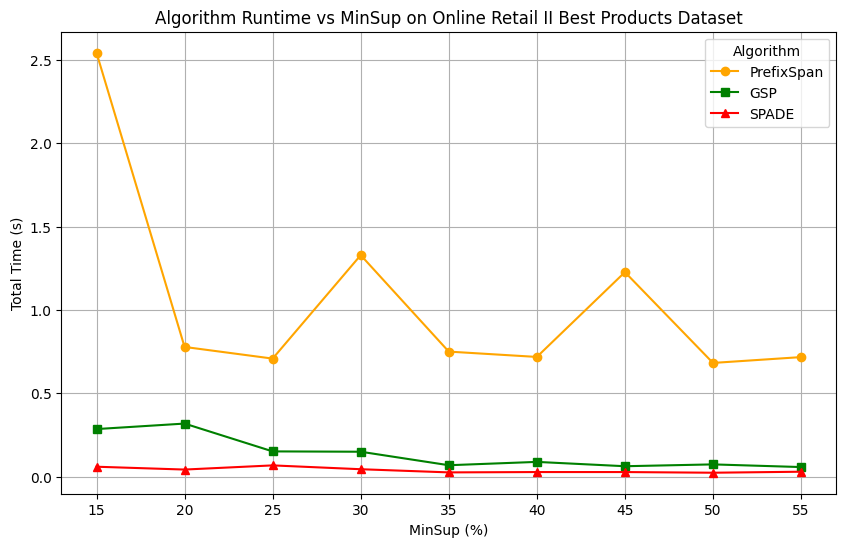

In [33]:
import subprocess
import re
import matplotlib.pyplot as plt

supports = [15, 20, 25, 30, 35, 40, 45, 50, 55]
input_file = "data/online_retail_II_all_products.txt"
algorithms = ["PrefixSpan", "GSP", "SPADE"]

results_table = []

for support in supports:
    for algo in algorithms:
        output_file = f"output/e_shop/{algo}_{support}percent.txt"
        command = ["java", "-jar", "spmf.jar", "run", algo, input_file, output_file, f"{support}%"]
        result = subprocess.run(command, capture_output=True, text=True)

        total_time_match = re.search(r"Total time ~ (\d+) ms", result.stdout)
        sequence_count_match = re.search(r"Frequent sequences count : (\d+)", result.stdout)

        if total_time_match and sequence_count_match:
            # Convert milliseconds to seconds
            total_time_seconds = int(total_time_match.group(1)) / 1000
            results_table.append({
                "Algorithm": algo,
                "Support (%)": support,
                "Total Time (s)": total_time_seconds,
                "Frequent Sequences Count": int(sequence_count_match.group(1))
            })

print(f"{'Algorithm':<12}{'Support (%)':<12}{'Total Time (s)':<15}{'Sequences Count':<18}")
print("=" * 60)
for result in results_table:
    print(f"{result['Algorithm']:<12}{result['Support (%)']:<12}{result['Total Time (s)']:<15.3f}{result['Frequent Sequences Count']:<18}")

# Extract runtime data for plotting
prefixspan_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "PrefixSpan"]
gsp_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "GSP"]
spade_times = [result["Total Time (s)"] for result in results_table if result["Algorithm"] == "SPADE"]

plt.figure(figsize=(10, 6))
plt.plot(supports, prefixspan_times, marker='o', color='orange', label='PrefixSpan')
plt.plot(supports, gsp_times, marker='s', color='green', label='GSP')
plt.plot(supports, spade_times, marker='^', color='red', label='SPADE')

plt.title("Algorithm Runtime vs MinSup on Online Retail II Best Products Dataset")
plt.xlabel("MinSup (%)")
plt.ylabel("Total Time (s)")
plt.legend(title="Algorithm")
plt.grid(True)
plt.show()


In [39]:
import subprocess
import re
import matplotlib.pyplot as plt

supports = [0]
input_file = "data/online_shop_data.txt"
algorithms = ["PrefixSpan"]

results_table = []

for support in supports:
    for algo in algorithms:
        output_file = "/content/output.txt"
        command = ["java", "-jar", "spmf.jar", "run", algo, input_file, output_file, f"{support}%"]
        result = subprocess.run(command, capture_output=True, text=True)

        total_time_match = re.search(r"Total time ~ (\d+) ms", result.stdout)
        sequence_count_match = re.search(r"Frequent sequences count : (\d+)", result.stdout)

        if total_time_match and sequence_count_match:
            # Convert milliseconds to seconds
            total_time_seconds = int(total_time_match.group(1)) / 1000
            results_table.append({
                "Algorithm": algo,
                "Support (%)": support,
                "Total Time (s)": total_time_seconds,
                "Frequent Sequences Count": int(sequence_count_match.group(1))
            })

print(f"{'Algorithm':<12}{'Support (%)':<12}{'Total Time (s)':<15}{'Sequences Count':<18}")
print("=" * 60)
for result in results_table:
    print(f"{result['Algorithm']:<12}{result['Support (%)']:<12}{result['Total Time (s)']:<15.3f}{result['Frequent Sequences Count']:<18}")




Algorithm   Support (%) Total Time (s) Sequences Count   
PrefixSpan  0           0.292          19295             


In [40]:
# Đọc dữ liệu từ file và sắp xếp theo SUP giảm dần
def sort_by_sup(input_file, output_file):
    # Đọc dữ liệu từ file
    with open(input_file, 'r') as f:
        lines = f.readlines()

    # Lấy giá trị SUP và sắp xếp các dòng
    lines_sorted = sorted(
        lines,
        key=lambda x: int(x.split("#SUP: ")[1].strip()),
        reverse=True
    )

    # Ghi dữ liệu đã sắp xếp ra file mới
    with open(output_file, 'w') as f:
        f.writelines(lines_sorted)

# Sử dụng hàm
input_file = '/content/output.txt'  # Thay thế bằng tên file đầu vào của bạn
output_file = '/content/output_new.txt'  # Tên file đầu ra

sort_by_sup(input_file, output_file)
